## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [6]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [10]:
diabetes_data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [12]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)
print(diabetes_data[columns_to_replace].head(10))

   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0      NaN  33.6
1     85.0           66.0           29.0      NaN  26.6
2    183.0           64.0            NaN      NaN  23.3
3     89.0           66.0           23.0     94.0  28.1
4    137.0           40.0           35.0    168.0  43.1
5    116.0           74.0            NaN      NaN  25.6
6     78.0           50.0           32.0     88.0  31.0
7    115.0            NaN            NaN      NaN  35.3
8    197.0           70.0           45.0    543.0  30.5
9    125.0           96.0            NaN      NaN   NaN


**<font color='teal'> Plot histograms of each column. </font>**

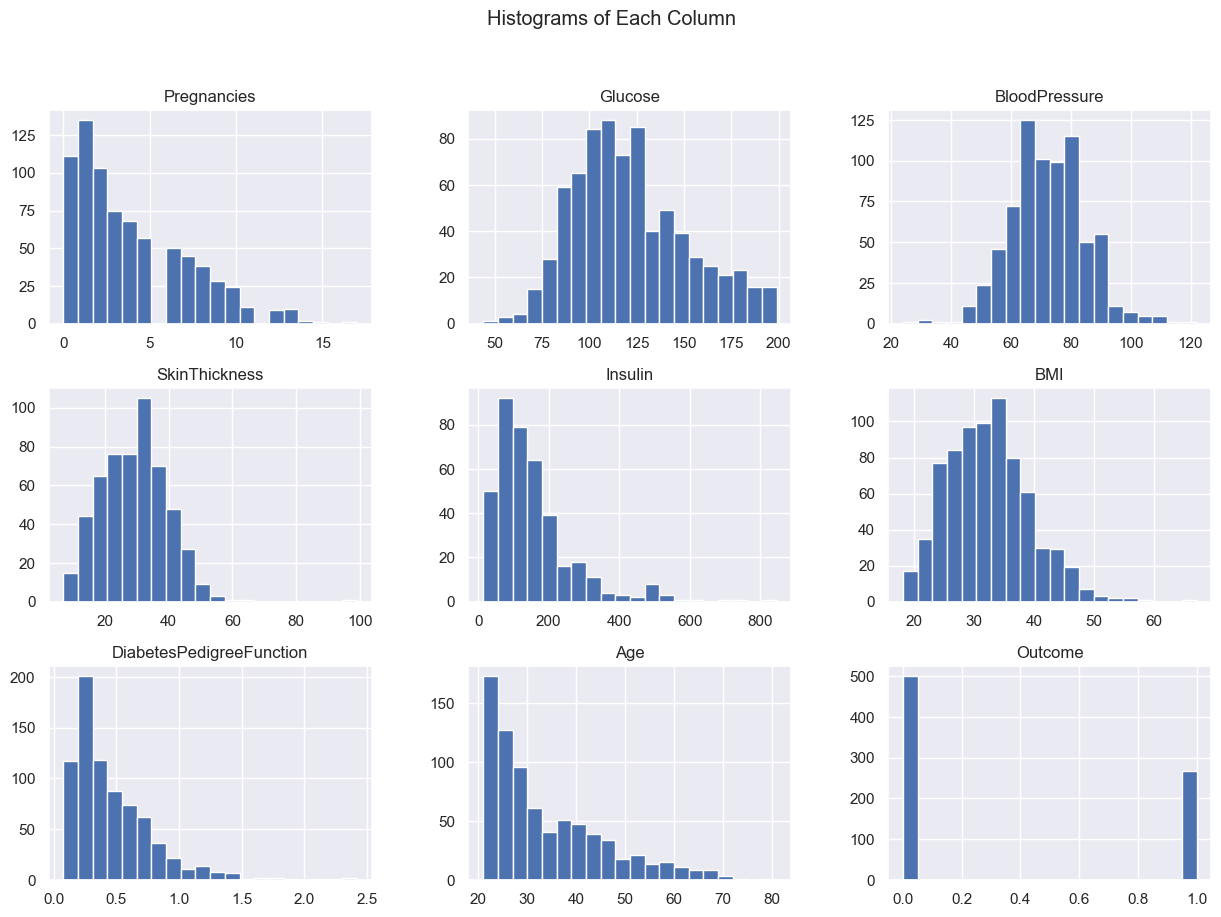

In [14]:
diabetes_data.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Each Column")
plt.show()

#### Replace the zeros with mean and median values.

In [16]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace=True)

C:\Users\omnia\AppData\Local\Temp\ipykernel_26060\4123311628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
C:\Users\omnia\AppData\Local\Temp\ipykernel_26060\4123311628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

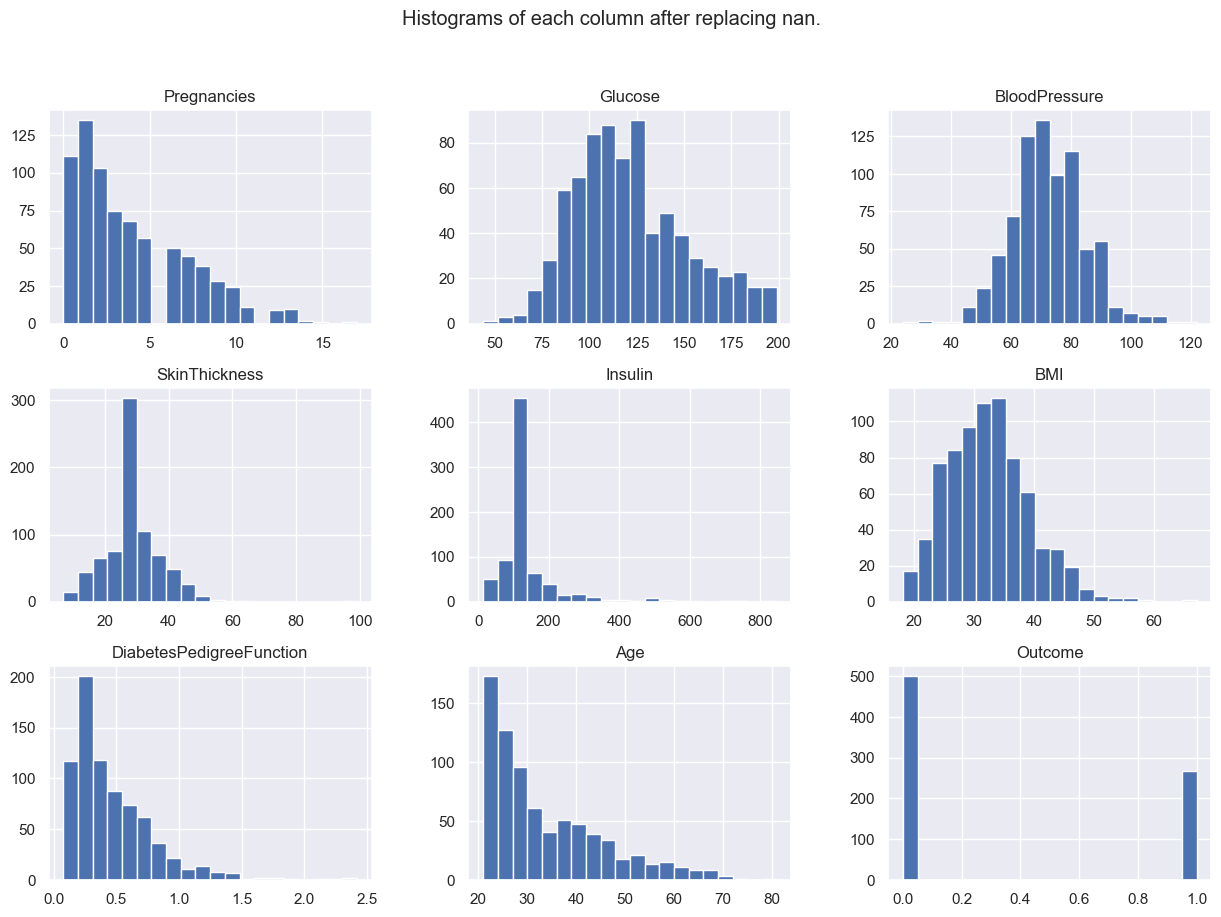

In [18]:
diabetes_data.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of each column after replacing nan.')
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


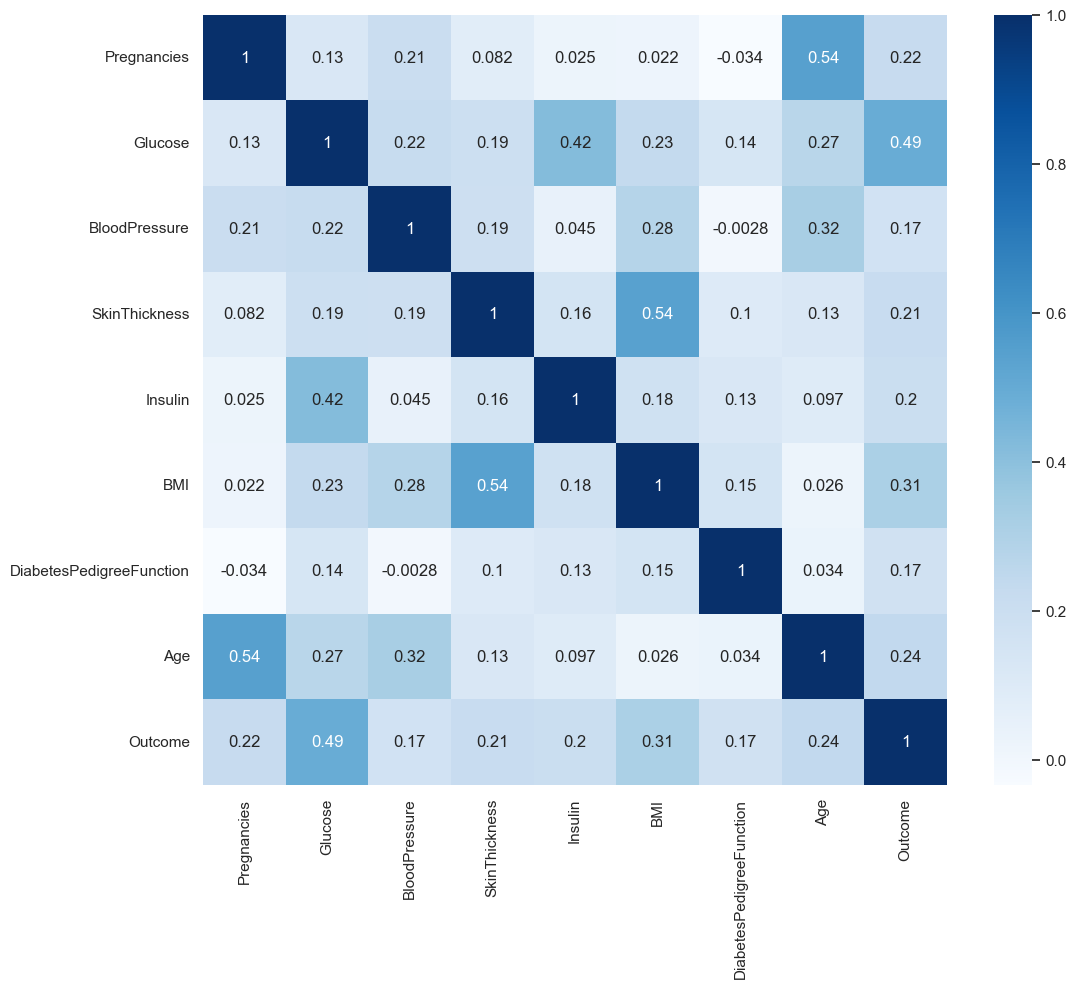

In [20]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [22]:
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [24]:
X =  diabetes_data.drop(columns=['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 60)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [29]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [31]:
print(f"Neighbors: {i} | Train Score: {train_scores[-1]:.4f} | Test Score: {test_scores[-1]:.4f}")

Neighbors: 9 | Train Score: 0.8082 | Test Score: 0.7013


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [33]:
max_train_score = max(train_scores)
optimal_neighbors = train_scores.index(max_train_score) + 1
print(f"The maximum training score is {max_train_score:.4f}, achieved with {optimal_neighbors} neighbors.")

The maximum training score is 1.0000, achieved with 1 neighbors.


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [35]:
max_test_score = max(test_scores)
optimal_neighbors_test = test_scores.index(max_test_score) + 1
print(f"The maximum test score is {max_test_score:.4f}, achieved with {optimal_neighbors_test} neighbors.")

The maximum test score is 0.7100, achieved with 7 neighbors.


Plot the train and test model performance by number of neighbors.

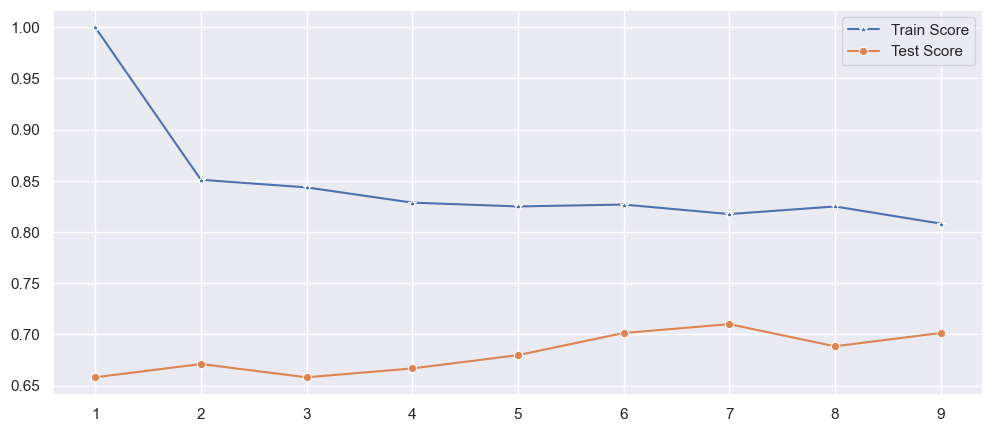

In [37]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10), y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [39]:
best_k = test_scores.index(max(test_scores)) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
train_score_best = knn_best.score(X_train, y_train)
test_score_best = knn_best.score(X_test, y_test)

print(f"Best number of neighbors (k): {best_k}")
print(f"Training Score with best k: {train_score_best:.4f}")
print(f"Testing Score with best k: {test_score_best:.4f}")

Best number of neighbors (k): 7
Training Score with best k: 0.8175
Testing Score with best k: 0.7100


In [40]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

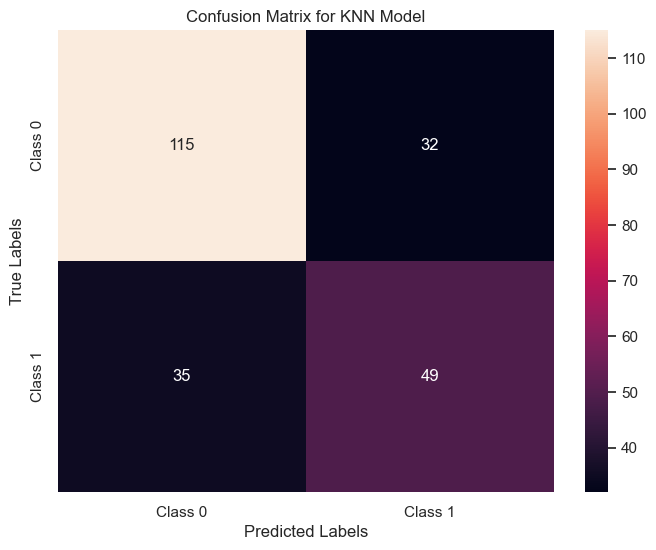

In [42]:
y_pred = knn_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [44]:
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.77      0.78      0.77       147
     Class 1       0.60      0.58      0.59        84

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [49]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [52]:
n_estimators_range = range(10, 110, 10)

train_scores_rf = []
test_scores_rf = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    train_accuracy = rf.score(X_train, y_train)
    test_accuracy = rf.score(X_test, y_test)
    
    train_scores_rf.append(train_accuracy)
    test_scores_rf.append(test_accuracy)

best_test_score_rf = max(test_scores_rf)
best_n_estimators_rf = n_estimators_range[test_scores_rf.index(best_test_score_rf)]

print(f"Best number of estimators: {best_n_estimators_rf}")
print(f"Best test accuracy: {best_test_score_rf:.4f}") 

Best number of estimators: 20
Best test accuracy: 0.7792


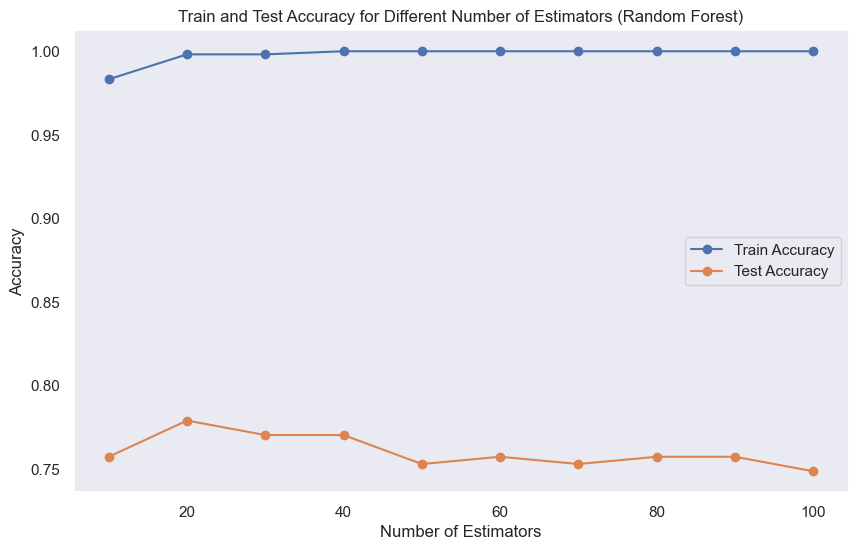

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores_rf, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores_rf, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Number of Estimators (Random Forest)')
plt.legend()
plt.grid()
plt.show()

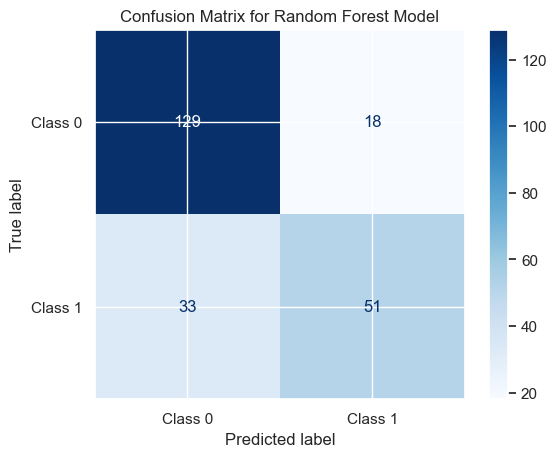

In [54]:
rf_best = RandomForestClassifier(n_estimators=best_n_estimators_rf, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [55]:
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf, target_names=["Class 0", "Class 1"]))

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

     Class 0       0.80      0.88      0.83       147
     Class 1       0.74      0.61      0.67        84

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [56]:
print(f"Best number of estimators: {best_n_estimators_rf}")
print(f"Best test accuracy: {best_test_score_rf:.4f}")

Best number of estimators: 20
Best test accuracy: 0.7792
